In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
import shutil

def remove_folder(folder_path):
    try:
        shutil.rmtree(folder_path)
        print(f"Folder '{folder_path}' and its contents successfully removed.")
    except Exception as e:
        print(f"An error occurred while removing the folder: {e}")



In [3]:
# remove folders
folder_to_remove = "sample-notebooks"
remove_folder(folder_to_remove)

Folder 'sample-notebooks' and its contents successfully removed.


In [7]:
#-------------------------------------------------------------------------------------------------------

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
######################################################################################### seeing admissions.csv file

In [30]:
df = pd.read_csv('admissions.csv')

In [32]:
df.isnull().sum()

subject_id                   0
hadm_id                      0
admittime                    0
dischtime                    0
deathtime               422633
admission_type               0
admit_provider_id            4
admission_location           0
discharge_location      119155
insurance                    0
language                     0
marital_status            9233
race                         0
edregtime               131949
edouttime               131949
hospital_expire_flag         0
dtype: int64

In [86]:
df.loc[:,'deathtime'].value_counts().value_counts()    #it's not reading the NaN.

1    8598
Name: deathtime, dtype: int64

In [88]:
df.describe()

,subject_id,hadm_id,hospital_expire_flag
count,4.312310e+05,4.312310e+05,431231.000000
mean,1.500766e+07,2.500314e+07,0.019964
std,2.877498e+06,2.888180e+06,0.139876
min,1.000003e+07,2.000002e+07,0.000000
25%,1.251557e+07,2.250155e+07,0.000000
50%,1.501288e+07,2.500669e+07,0.000000
75%,1.749622e+07,2.750470e+07,0.000000
max,1.999999e+07,2.999993e+07,1.000000


In [34]:
df0 = df.sample(n=10000)
#df0 = df
len(df0)

431231

In [38]:
df0

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431226,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,P75BG6,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0
431227,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,P16C7J,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2147-07-17 17:18:00,2147-07-18 17:34:00,0
431228,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,P58A9J,EMERGENCY ROOM,DIED,Other,ENGLISH,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1
431229,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,P506DE,EMERGENCY ROOM,HOME,Other,ENGLISH,WIDOWED,WHITE,2164-07-24 21:16:00,2164-07-25 01:20:00,0


In [36]:
#Conversão para datetime
df0['admittime'] = pd.to_datetime(df0['admittime'])
df0['dischtime'] = pd.to_datetime(df0['dischtime'])

In [56]:
def check_readmission(subdf):
    subdf = subdf.sort_values(by='admittime')
    time_differences = (subdf['admittime'].iloc[1:].reset_index(drop=True) - 
      subdf['dischtime'].iloc[0:-1].reset_index(drop = True)
    )
    readmission = (time_differences.dt.days < 30).astype(int)
    readmission = np.append(readmission,0)
    return readmission

target = (df0.groupby('subject_id').apply(check_readmission)).explode().to_frame()
target.reset_index(inplace=True)
target.columns = ['subject_id','target']

# Save the 'target' DataFrame with both 'subject_id' and 'hadm_id'
target_with_hadm = target.merge(df0[['subject_id', 'hadm_id']], on='subject_id', how='left')
target_with_hadm.drop_duplicates(subset=['subject_id', 'hadm_id'], inplace=True)

complete_df = df0.merge(target_with_hadm[['target','hadm_id']], on='hadm_id', how='left')
len(complete_df)

431231

In [229]:
#csv_path = 'complete_df.csv'
#complete_df.to_csv(csv_path, index=False)

In [233]:
#Keep only the rows where target is 1
#within_30_days = df0[df0['target'] == 1]
#within_30_days
within_30_days = complete_df

In [237]:
len(within_30_days)

431231

In [239]:
within_30_days.nunique()

subject_id              180733
hadm_id                 431231
admittime               424564
dischtime               420653
deathtime                 8598
admission_type               9
admit_provider_id         1728
admission_location          11
discharge_location          13
insurance                    3
language                     2
marital_status               4
race                        33
edregtime               293964
edouttime               294010
hospital_expire_flag         2
target                       2
dtype: int64

In [241]:
within_30_days.isna().sum()   #contagem dos NaN

subject_id                   0
hadm_id                      0
admittime                    0
dischtime                    0
deathtime               422633
admission_type               0
admit_provider_id            4
admission_location           0
discharge_location      119155
insurance                    0
language                     0
marital_status            9233
race                         0
edregtime               131949
edouttime               131949
hospital_expire_flag         0
target                       0
dtype: int64

In [243]:
#drop columns
columns_to_drop = ['language','edregtime','edouttime']
droped_30days_df = within_30_days.drop(columns=columns_to_drop)
droped_30days_df.isna().sum()

subject_id                   0
hadm_id                      0
admittime                    0
dischtime                    0
deathtime               422633
admission_type               0
admit_provider_id            4
admission_location           0
discharge_location      119155
insurance                    0
marital_status            9233
race                         0
hospital_expire_flag         0
target                       0
dtype: int64

In [245]:
# Create a new binary column based of DEATHTIME; 1 - death; 0 - no death.
droped_30days_df['BINARY_DEATH'] = droped_30days_df['deathtime'].replace('NaN', int(0))
droped_30days_df['BINARY_DEATH'] = droped_30days_df['deathtime'].notna().astype(int)

In [247]:
droped_30days_df['BINARY_DEATH'].value_counts()

0    422633
1      8598
Name: BINARY_DEATH, dtype: int64

In [249]:
#drop columns DEATHTIME
columns_to_drop = ['deathtime']
droped_30days_df0 = droped_30days_df.drop(columns=columns_to_drop)
droped_30days_df0.isna().sum()

subject_id                   0
hadm_id                      0
admittime                    0
dischtime                    0
admission_type               0
admit_provider_id            4
admission_location           0
discharge_location      119155
insurance                    0
marital_status            9233
race                         0
hospital_expire_flag         0
target                       0
BINARY_DEATH                 0
dtype: int64

In [251]:
droped_30days_df0['BINARY_DEATH'].value_counts()

0    422633
1      8598
Name: BINARY_DEATH, dtype: int64

In [253]:
#Só mostrar a informaçao por cada subject_id
dropedid_30days_df0 = droped_30days_df0.drop_duplicates(subset='subject_id', keep='first')
len(dropedid_30days_df0)

180733

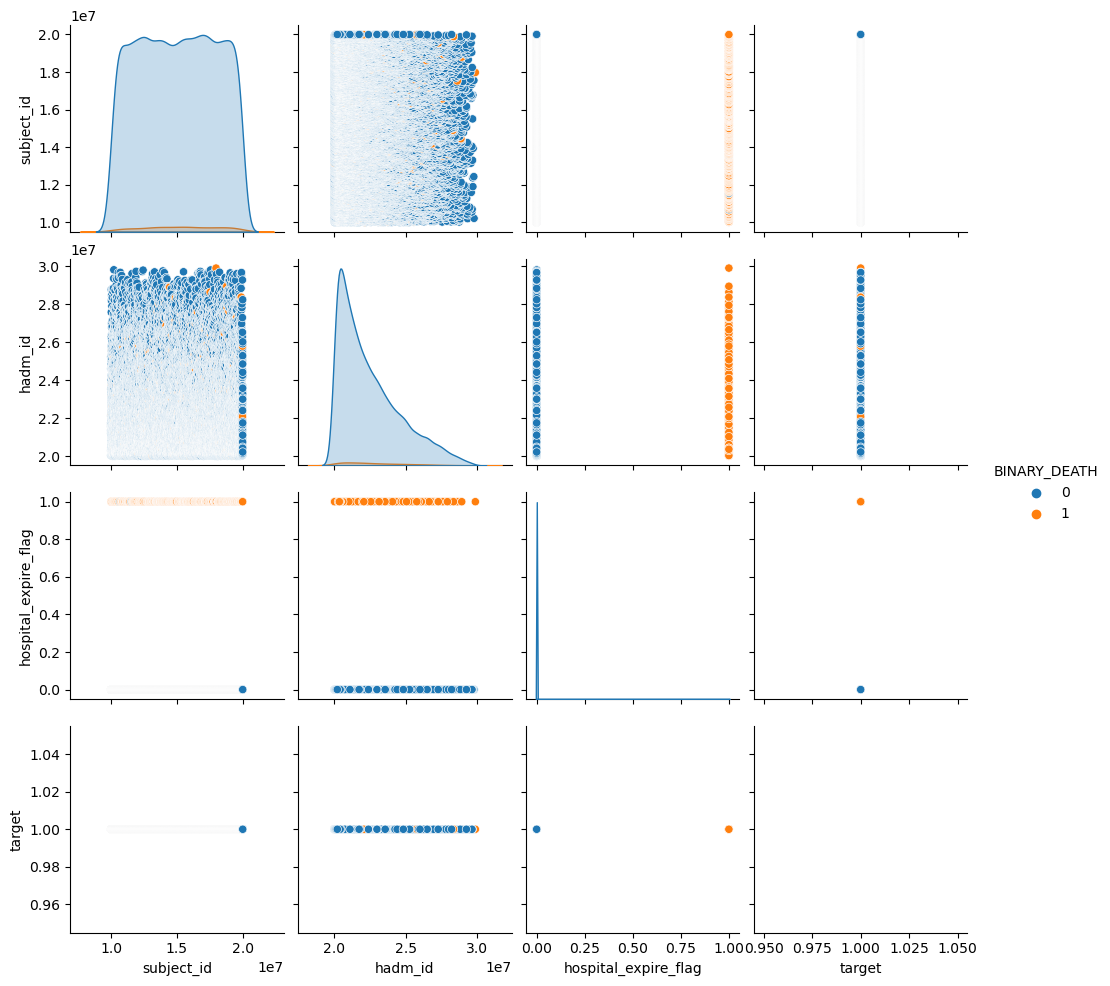

In [132]:
sns.pairplot(dropedid_30days_df0, hue='BINARY_DEATH')

In [133]:
most_frequent_admissionplace= droped_30days_df0['admission_location'].value_counts().index[0]
most_frequent_admissionplace

'EMERGENCY ROOM'

In [25]:
most_frequent_admissiontype= droped_30days_df0['admission_type'].value_counts().index[0]
most_frequent_admissiontype

'EW EMER.'

In [26]:
most_frequent_discharge = droped_30days_df0['discharge_location'].value_counts().index[0]
most_frequent_discharge 

'HOME'

In [27]:
######################################################################################### seeing dignoses_icd.csv file

In [136]:
df1 = pd.read_csv('diagnoses_icd.csv')

In [137]:
df1_1 = pd.read_csv('d_icd_diagnoses.csv')

In [30]:
most_frequent_diagnosis = df1['icd_code'].value_counts().index[0]
most_frequent_diagnosis

'4019'

In [31]:
secondmost_frequent_diagnosis = df1['icd_code'].value_counts().index[1]
secondmost_frequent_diagnosis

'2724'

In [32]:
thirdmost_frequent_diagnosis = df1['icd_code'].value_counts().index[2]
thirdmost_frequent_diagnosis

'I10'

In [33]:
fourmost_frequent_diagnosis = df1['icd_code'].value_counts().index[3]
fourmost_frequent_diagnosis

'E785'

In [34]:
######################################################################################### seeing icustays.csv file

In [138]:
df2 = pd.read_csv('icustays.csv')

In [36]:
most_frequent_careunit = df2['first_careunit'].value_counts().index[0]
most_frequent_careunit

'Medical Intensive Care Unit (MICU)'

In [37]:
most_frequent_endcareunit = df2['last_careunit'].value_counts().index[0]
most_frequent_endcareunit

'Medical Intensive Care Unit (MICU)'

In [142]:
frequent_patient_icu = df2['subject_id'].value_counts().to_frame()
frequent_patient_icu.reset_index(inplace=True)
frequent_patient_icu.rename(columns={'index': 'subject_id','subject_id' : 'count_icu'}, inplace=True)
frequent_patient_icu

,subject_id,count_icu
0,18358138,37
1,17585185,33
2,12468016,33
3,13269859,30
4,18676703,26
...,...,...
50915,13794732,1
50916,13795136,1
50917,13795513,1
50918,13795693,1


In [144]:
most_frequent_patient = df2['subject_id'].value_counts().index[0] 
most_frequent_patient

18358138

In [40]:
#----------------------------------------------------------------------------------

In [41]:
# JUNTAR DATASETS - criar dataset new30df

In [146]:
df3 = pd.read_csv('patients.csv')
df3

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN
...,...,...,...,...,...,...
299707,19999828,F,46,2147,2017 - 2019,NaN
299708,19999829,F,28,2186,2008 - 2010,NaN
299709,19999840,M,58,2164,2008 - 2010,2164-09-17
299710,19999914,F,49,2158,2017 - 2019,NaN


In [255]:
#drop columns 
columns_to_drop = ['hadm_id','admittime','dischtime','admit_provider_id','admission_location','insurance','hospital_expire_flag']
new30df = dropedid_30days_df0.drop(columns=columns_to_drop)

In [150]:
frequent_patient_adm = droped_30days_df0['subject_id'].value_counts().to_frame()
frequent_patient_adm.reset_index(inplace=True)
frequent_patient_adm.rename(columns={'index': 'subject_id','subject_id' : 'count_adm'}, inplace=True)
frequent_patient_adm

,subject_id,count_adm
0,15464144,185
1,16662316,142
2,13475033,97
3,17011846,94
4,12468016,89
...,...,...
24791,16560909,2
24792,16562319,2
24793,12905732,2
24794,16563580,2


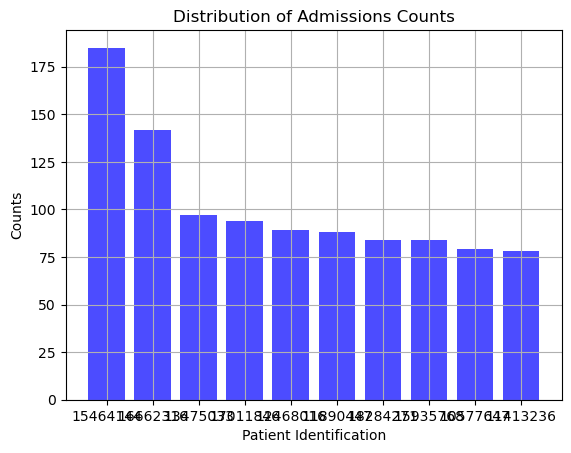

In [152]:
top_10 = frequent_patient_adm.sort_values(by='count_adm', ascending=False).head(10)
plt.bar(top_10['subject_id'].astype(str), top_10['count_adm'], color='blue', alpha=0.7)
plt.xlabel('Patient Identification')
plt.ylabel('Counts')
plt.title('Distribution of Admissions Counts')
plt.grid(True)
plt.show()

In [257]:
new30df1 = new30df.merge(df3[['subject_id','gender','anchor_age']], on='subject_id', how='left')
new30df1

,subject_id,admission_type,discharge_location,marital_status,race,target,BINARY_DEATH,gender,anchor_age
0,10000032,URGENT,HOME,WIDOWED,WHITE,0,0,F,52
1,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,F,19
2,10000084,EW EMER.,HOME HEALTH CARE,MARRIED,WHITE,0,0,M,72
3,10000108,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,M,25
4,10000117,EU OBSERVATION,NaN,DIVORCED,WHITE,0,0,F,48
...,...,...,...,...,...,...,...,...,...
180728,19999733,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,F,19
180729,19999784,ELECTIVE,HOME HEALTH CARE,SINGLE,BLACK/AFRICAN AMERICAN,1,0,M,57
180730,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,0,F,46
180731,19999840,EW EMER.,DIED,WIDOWED,WHITE,0,1,M,58


In [259]:
new30df2 = new30df1.merge(frequent_patient_icu[['subject_id','count_icu']], on='subject_id', how='left')
new30df2['count_icu'].fillna(0, inplace=True)
new30df2

,subject_id,admission_type,discharge_location,marital_status,race,target,BINARY_DEATH,gender,anchor_age,count_icu
0,10000032,URGENT,HOME,WIDOWED,WHITE,0,0,F,52,1.0
1,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,F,19,0.0
2,10000084,EW EMER.,HOME HEALTH CARE,MARRIED,WHITE,0,0,M,72,0.0
3,10000108,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,M,25,0.0
4,10000117,EU OBSERVATION,NaN,DIVORCED,WHITE,0,0,F,48,0.0
...,...,...,...,...,...,...,...,...,...,...
180728,19999733,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,F,19,0.0
180729,19999784,ELECTIVE,HOME HEALTH CARE,SINGLE,BLACK/AFRICAN AMERICAN,1,0,M,57,0.0
180730,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,0,F,46,1.0
180731,19999840,EW EMER.,DIED,WIDOWED,WHITE,0,1,M,58,1.0


In [261]:
new30df3 = new30df2.merge(frequent_patient_adm[['subject_id','count_adm']], on='subject_id', how='left')
new30df3['count_adm'].fillna(0, inplace=True)
new30df3

,subject_id,admission_type,discharge_location,marital_status,race,target,BINARY_DEATH,gender,anchor_age,count_icu,count_adm
0,10000032,URGENT,HOME,WIDOWED,WHITE,0,0,F,52,1.0,0.0
1,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,F,19,0.0,0.0
2,10000084,EW EMER.,HOME HEALTH CARE,MARRIED,WHITE,0,0,M,72,0.0,0.0
3,10000108,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,M,25,0.0,0.0
4,10000117,EU OBSERVATION,NaN,DIVORCED,WHITE,0,0,F,48,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
180728,19999733,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,F,19,0.0,0.0
180729,19999784,ELECTIVE,HOME HEALTH CARE,SINGLE,BLACK/AFRICAN AMERICAN,1,0,M,57,0.0,18.0
180730,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,0,F,46,1.0,0.0
180731,19999840,EW EMER.,DIED,WIDOWED,WHITE,0,1,M,58,1.0,0.0


In [263]:
df11 = df1.merge(df1_1[['icd_code','long_title']], on='icd_code', how='left')
df11

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
0,10000032,22595853,1,5723,9,Portal hypertension
1,10000032,22595853,2,78959,9,Other ascites
2,10000032,22595853,3,5715,9,Cirrhosis of liver without mention of alcohol
3,10000032,22595853,4,07070,9,Unspecified viral hepatitis C without hepatic ...
4,10000032,22595853,5,496,9,"Chronic airway obstruction, not elsewhere clas..."
...,...,...,...,...,...,...
4860275,19999987,23865745,7,41401,9,Coronary atherosclerosis of native coronary ar...
4860276,19999987,23865745,8,78039,9,Other convulsions
4860277,19999987,23865745,9,0413,9,Friedländer's bacillus infection in conditions...
4860278,19999987,23865745,10,36846,9,Homonymous bilateral field defects


In [265]:
filtered_df11 = df11.loc[df11['seq_num'] == 1]
len(filtered_df11)
df11droped = filtered_df11.drop(columns = ['hadm_id','seq_num','icd_version'])

In [267]:
df11droped

,subject_id,icd_code,long_title
0,10000032,5723,Portal hypertension
8,10000032,07071,Unspecified viral hepatitis C with hepatic coma
16,10000032,07054,Chronic hepatitis C without mention of hepatic...
27,10000032,45829,Other iatrogenic hypotension
41,10000068,30500,"Alcohol abuse, unspecified"
...,...,...,...
4860209,19999828,T8141XA,"Infection following a procedure, superficial i..."
4860228,19999828,T8131XA,Disruption of external operation (surgical) wo...
4860250,19999840,3453,Grand mal status
4860262,19999840,43491,"Cerebral artery occlusion, unspecified with ce..."


In [52]:
#---------------------------------------------------------------------------------- Plots

In [269]:
len(new30df3)

180733

In [271]:
new30df3

,subject_id,admission_type,discharge_location,marital_status,race,target,BINARY_DEATH,gender,anchor_age,count_icu,count_adm
0,10000032,URGENT,HOME,WIDOWED,WHITE,0,0,F,52,1.0,0.0
1,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,F,19,0.0,0.0
2,10000084,EW EMER.,HOME HEALTH CARE,MARRIED,WHITE,0,0,M,72,0.0,0.0
3,10000108,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,M,25,0.0,0.0
4,10000117,EU OBSERVATION,NaN,DIVORCED,WHITE,0,0,F,48,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
180728,19999733,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,F,19,0.0,0.0
180729,19999784,ELECTIVE,HOME HEALTH CARE,SINGLE,BLACK/AFRICAN AMERICAN,1,0,M,57,0.0,18.0
180730,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,0,F,46,1.0,0.0
180731,19999840,EW EMER.,DIED,WIDOWED,WHITE,0,1,M,58,1.0,0.0


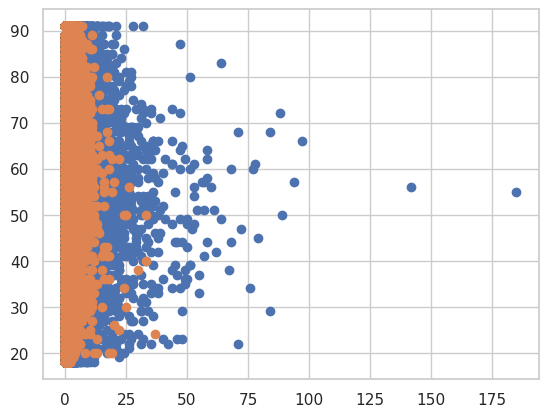

In [273]:
Age = new30df3['anchor_age']
count_adm = new30df3['count_adm']
count_icu = new30df3['count_icu']
plt.scatter(count_adm, Age)
plt.scatter(count_icu, Age)
plt.show()

(array([17439., 15145., 14274., 16780., 19741., 22111., 24974., 18316.,
        15750., 16203.]),
 array([18. , 25.3, 32.6, 39.9, 47.2, 54.5, 61.8, 69.1, 76.4, 83.7, 91. ]),
 <BarContainer object of 10 artists>)

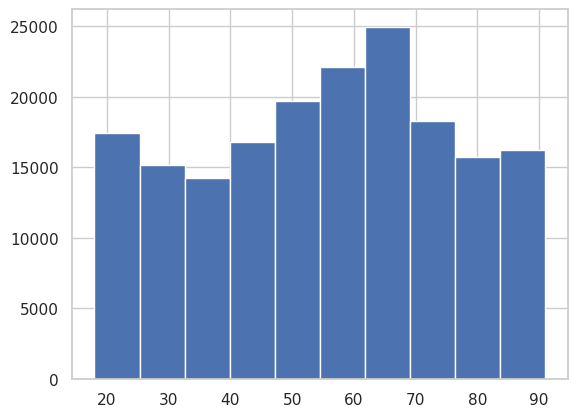

In [275]:
plt.hist(Age)

#plt.savefig('<path_to_save>.png')

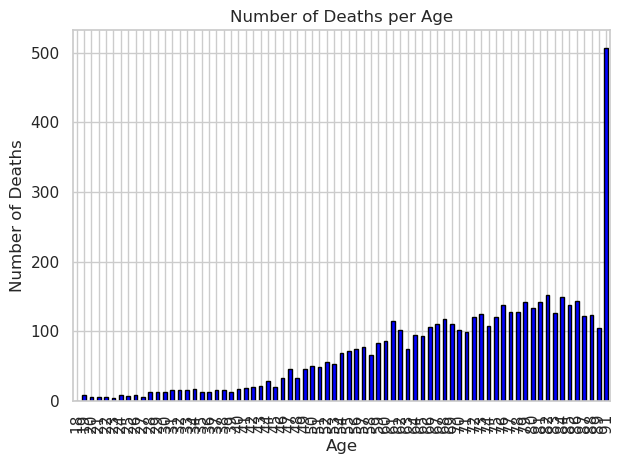

In [277]:
age_groups = new30df3.groupby('anchor_age')['BINARY_DEATH'].sum()

age_groups.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Number of Deaths per Age')
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
plt.tight_layout()  # Adjust spacing
plt.show()  

#plt.savefig('<path_to_save>.png')

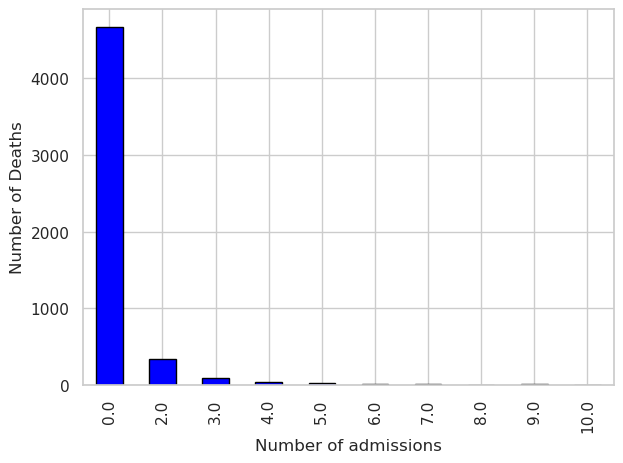

In [279]:
countsadm_groups = new30df3.groupby('count_adm')['BINARY_DEATH'].sum().head(10)

countsadm_groups.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Number of admissions')
plt.ylabel('Number of Deaths')
plt.tight_layout()  # Adjust spacing
plt.show()

#plt.savefig('<path_to_save>.png')

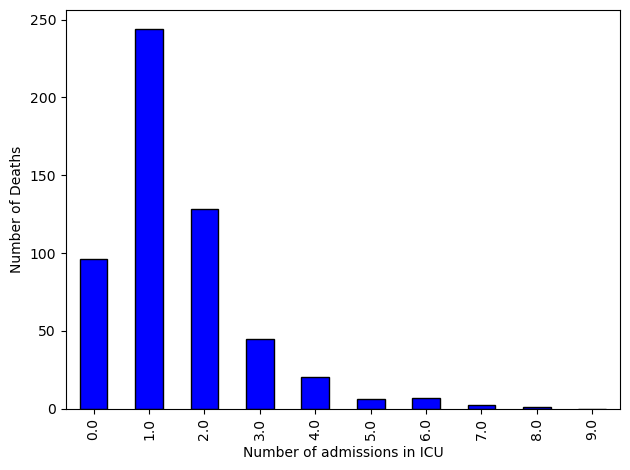

In [176]:
countsicu_groups = new30df3.groupby('count_icu')['BINARY_DEATH'].sum().head(10)

countsicu_groups.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Number of admissions in ICU')
plt.ylabel('Number of Deaths')
plt.tight_layout()  # Adjust spacing
plt.show()  #Quem vai para ICU, quase que não escapa   . 0 era Nan values. 

#plt.savefig('<path_to_save>.png')

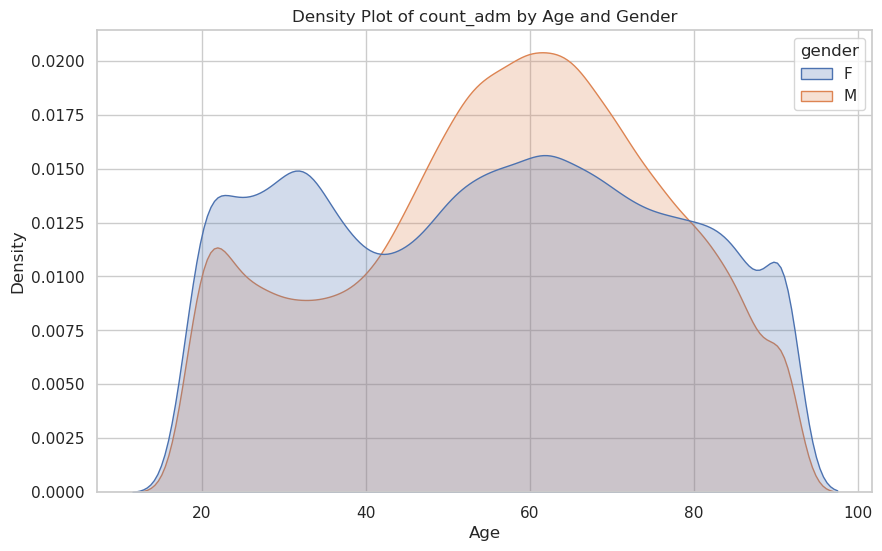

In [281]:
# Create a KDE (Kernel Density Estimation) plot using seaborn
count_adm = new30df3[['count_adm','gender','anchor_age']]
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=count_adm, x='anchor_age', hue="gender", common_norm=False, fill=True)

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Density Plot of count_adm by Age and Gender")

# Display the plot
plt.show()

In [179]:
#################################################################################################

In [283]:
new30df4 = pd.merge(new30df3,df11droped, on='subject_id', how='left')
new30df4

,subject_id,admission_type,discharge_location,marital_status,race,target,BINARY_DEATH,gender,anchor_age,count_icu,count_adm,icd_code,long_title
0,10000032,URGENT,HOME,WIDOWED,WHITE,0,0,F,52,1.0,0.0,5723,Portal hypertension
1,10000032,URGENT,HOME,WIDOWED,WHITE,0,0,F,52,1.0,0.0,07071,Unspecified viral hepatitis C with hepatic coma
2,10000032,URGENT,HOME,WIDOWED,WHITE,0,0,F,52,1.0,0.0,07054,Chronic hepatitis C without mention of hepatic...
3,10000032,URGENT,HOME,WIDOWED,WHITE,0,0,F,52,1.0,0.0,45829,Other iatrogenic hypotension
4,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,F,19,0.0,0.0,30500,"Alcohol abuse, unspecified"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432512,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,0,F,46,1.0,0.0,T8141XA,"Infection following a procedure, superficial i..."
432513,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,0,F,46,1.0,0.0,T8131XA,Disruption of external operation (surgical) wo...
432514,19999840,EW EMER.,DIED,WIDOWED,WHITE,0,1,M,58,1.0,0.0,3453,Grand mal status
432515,19999840,EW EMER.,DIED,WIDOWED,WHITE,0,1,M,58,1.0,0.0,43491,"Cerebral artery occlusion, unspecified with ce..."


In [285]:
len(new30df4)

432517

In [287]:
len(df0)

431231

In [289]:
#Só mostrar a informaçao por cada subject_id
new30df4drop = new30df4.drop_duplicates(subset='subject_id', keep='first')
len(new30df4drop)

180733

In [291]:
new30df4drop


,subject_id,admission_type,discharge_location,marital_status,race,target,BINARY_DEATH,gender,anchor_age,count_icu,count_adm,icd_code,long_title
0,10000032,URGENT,HOME,WIDOWED,WHITE,0,0,F,52,1.0,0.0,5723,Portal hypertension
4,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,F,19,0.0,0.0,30500,"Alcohol abuse, unspecified"
5,10000084,EW EMER.,HOME HEALTH CARE,MARRIED,WHITE,0,0,M,72,0.0,0.0,G3183,Dementia with Lewy bodies
7,10000108,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,M,25,0.0,0.0,5283,Cellulitis and abscess of oral soft tissues
8,10000117,EU OBSERVATION,NaN,DIVORCED,WHITE,0,0,F,48,0.0,0.0,R1310,"Dysphagia, unspecified"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432493,19999733,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,F,19,0.0,0.0,9953,"Allergy, unspecified, not elsewhere classified"
432494,19999784,ELECTIVE,HOME HEALTH CARE,SINGLE,BLACK/AFRICAN AMERICAN,1,0,M,57,0.0,18.0,Z5111,Encounter for antineoplastic chemotherapy
432512,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,0,F,46,1.0,0.0,T8141XA,"Infection following a procedure, superficial i..."
432514,19999840,EW EMER.,DIED,WIDOWED,WHITE,0,1,M,58,1.0,0.0,3453,Grand mal status


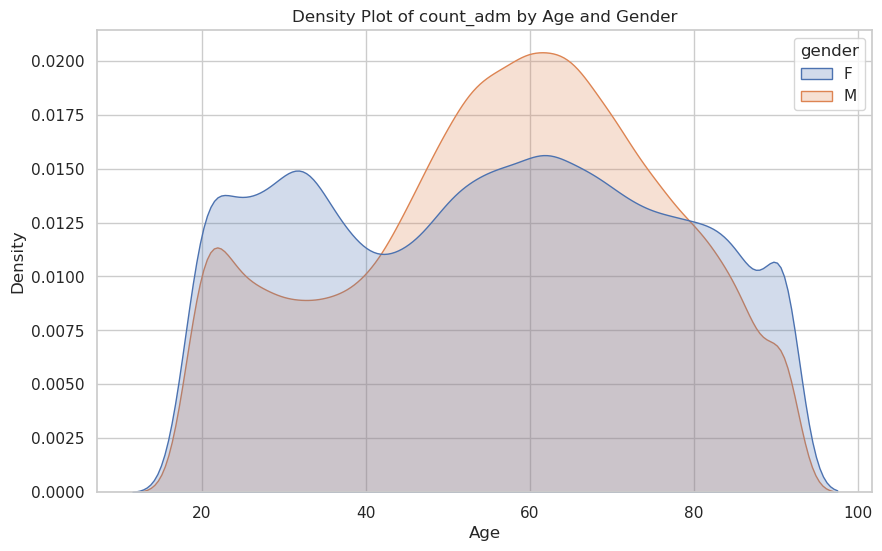

In [293]:
# Create a KDE (Kernel Density Estimation) plot using seaborn
count_adm = new30df4drop[['count_adm','gender','anchor_age']]
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=count_adm, x='anchor_age', hue="gender", common_norm=False, fill=True)

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Density Plot of count_adm by Age and Gender")

# Display the plot
plt.show()      #praticamente igual ao anterior

In [295]:
# Count occurrences of the word "hypertension" in the "long_title" column
hypertension_count = new30df4drop['long_title'].str.contains('hypertension', case=False).sum()
hypertension_count 

1096

In [297]:
# Count occurrences of the word "hyperlipidemia" in the "long_title" column
hyperlipidemia_count = new30df4drop['long_title'].str.contains('hyperlipidemia', case=False).sum()
hyperlipidemia_count

6

In [299]:
from collections import Counter
import re

In [301]:
# Convert 'icd_code' to strings
new30df4drop['icd_code'] = new30df4drop['icd_code'].astype(str)

# Count occurrences of each 'icd_code'
icd_counts = Counter(new30df4drop['long_title'])
icd_code_counts = Counter(new30df4drop['icd_code'])
# Find the most common 'icd_code' strings
most_common_icd = icd_counts.most_common(5)
most_common_icd_codes = icd_code_counts.most_common(5)
 
# Extract the codes and counts
icd = [icd for icd, count in most_common_icd]
icd_codes = [code for code, count in most_common_icd_codes]
print(icd)
print(icd_codes)
code_counts = [count for code, count in most_common_icd_codes]


['Chest pain, unspecified', 'Other chest pain', 'Coronary atherosclerosis of native coronary artery', 'Alcohol abuse, unspecified', 'Syncope and collapse']
['78650', '41401', '78659', '30500', '311']


/tmp/ipykernel_104/2902971257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new30df4drop['icd_code'] = new30df4drop['icd_code'].astype(str)


In [303]:
# Filter the dataset for the common codes
filtered_dataset = new30df4drop[new30df4drop['long_title'].isin(icd)]
filtered_dataset

,subject_id,admission_type,discharge_location,marital_status,race,target,BINARY_DEATH,gender,anchor_age,count_icu,count_adm,icd_code,long_title
4,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,F,19,0.0,0.0,30500,"Alcohol abuse, unspecified"
21,10000886,EU OBSERVATION,NaN,SINGLE,UNABLE TO OBTAIN,0,0,M,18,0.0,0.0,30500,"Alcohol abuse, unspecified"
100,10002131,EU OBSERVATION,NaN,WIDOWED,WHITE,0,0,F,87,0.0,0.0,78650,"Chest pain, unspecified"
242,10004422,EW EMER.,HOME HEALTH CARE,WIDOWED,WHITE,0,0,M,78,1.0,0.0,41401,Coronary atherosclerosis of native coronary ar...
243,10004457,AMBULATORY OBSERVATION,NaN,SINGLE,WHITE,0,0,M,65,1.0,0.0,41401,Coronary atherosclerosis of native coronary ar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432416,19997887,EU OBSERVATION,NaN,MARRIED,WHITE,0,0,F,57,0.0,0.0,78650,"Chest pain, unspecified"
432425,19997922,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,F,35,0.0,0.0,78650,"Chest pain, unspecified"
432442,19998497,EW EMER.,HOME HEALTH CARE,WIDOWED,WHITE,0,0,F,82,0.0,0.0,41401,Coronary atherosclerosis of native coronary ar...
432474,19999156,EU OBSERVATION,NaN,MARRIED,WHITE,0,0,F,62,0.0,0.0,78650,"Chest pain, unspecified"


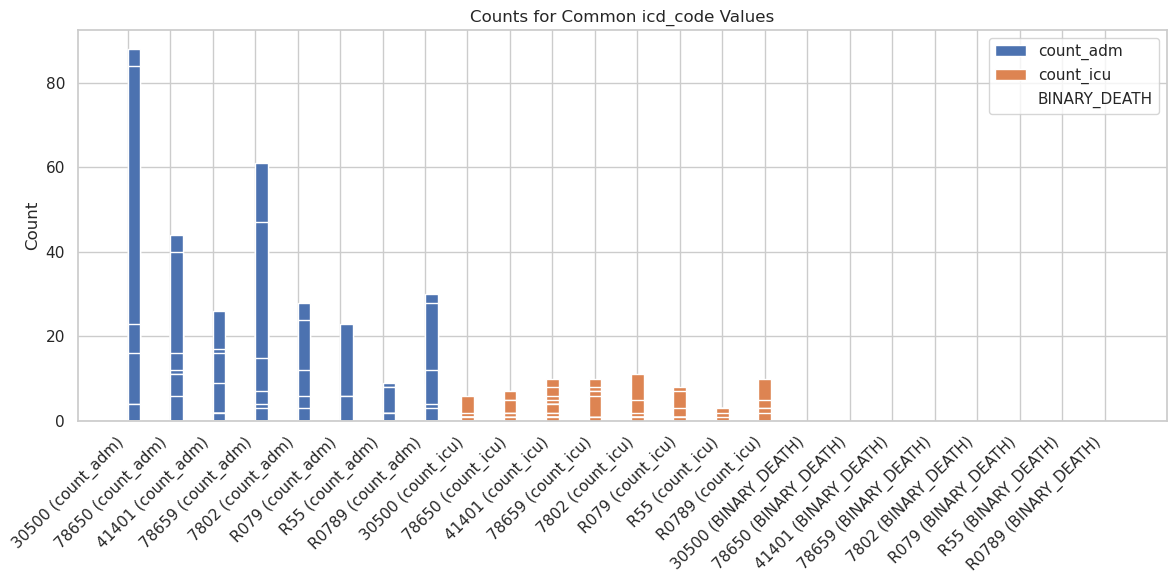

In [305]:
# Grouped bar plot using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(filtered_dataset['icd_code'] + ' (count_adm)', filtered_dataset['count_adm'], width=0.3, align='edge', label='count_adm')
plt.bar(filtered_dataset['icd_code'] + ' (count_icu)', filtered_dataset['count_icu'], width=0.3, align='center', label='count_icu')
plt.bar(filtered_dataset['icd_code'] + ' (BINARY_DEATH)', filtered_dataset['BINARY_DEATH'], width=0.3, align='edge', label='BINARY_DEATH', alpha=0)
plt.ylabel('Count')
plt.title('Counts for Common icd_code Values')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

#plt.savefig('<path_to_save>.png')

In [306]:
# Convert the "long_title" column to strings
new30df4drop['long_title'] = new30df4drop['long_title'].astype(str)

# Concatenate all "long_title" strings
concatenated_text = ' '.join(new30df4drop['long_title'])

# Tokenize the text into words
words = re.findall(r'\w+', concatenated_text.lower())  # Convert to lowercase for case-insensitive counting

# Filter words with more than 5 letters
filtered_words = [word for word in words if len(word) > 5 and "unspecified" not in word and "without" not in word  and "mention" not in word]

# Count occurrences of each word
word_counts = Counter(filtered_words)

# Find the most common word
most_common_word, most_common_count = word_counts.most_common(1)[0]

print("Most common word:", most_common_word)
print("Count:", most_common_count)

/tmp/ipykernel_104/118066361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new30df4drop['long_title'] = new30df4drop['long_title'].astype(str)


Most common word: fracture
Count: 14504


In [309]:
# Find the most common word
most_common_words = word_counts.most_common(10)

print("Ten most common words")
for word, count in most_common_words:
    print(word, "-", count)

Ten most common words
fracture - 14504
initial - 11249
encounter - 10581
closed - 9608
neoplasm - 8696
hemorrhage - 8384
malignant - 7534
infarction - 7468
condition - 7275
disorder - 7216


In [76]:
################# in not dropped file: new30df4

In [311]:
# Convert 'icd_code' to strings
new30df4['icd_code'] = new30df4['icd_code'].astype(str)

# Count occurrences of each 'icd_code'
bicd_counts = Counter(new30df4['long_title'])
bicd_code_counts = Counter(new30df4['icd_code'])
# Find the most common 'icd_code' strings
bmost_common_icd = icd_counts.most_common(5)
bmost_common_icd_codes = icd_code_counts.most_common(5)
 
# Extract the codes and counts
bicd = [icd for icd, count in bmost_common_icd]
bicd_codes = [code for code, count in bmost_common_icd_codes]
print(icd)
print(icd_codes)
bcode_counts = [count for code, count in bmost_common_icd_codes]


['Chest pain, unspecified', 'Other chest pain', 'Coronary atherosclerosis of native coronary artery', 'Alcohol abuse, unspecified', 'Syncope and collapse']
['78650', '41401', '78659', '30500', '311']


In [313]:
# Filter the dataset for the common codes
bfiltered_dataset = new30df4[new30df4['long_title'].isin(bicd)]
bfiltered_dataset

,subject_id,admission_type,discharge_location,marital_status,race,target,BINARY_DEATH,gender,anchor_age,count_icu,count_adm,icd_code,long_title
4,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,F,19,0.0,0.0,30500,"Alcohol abuse, unspecified"
21,10000886,EU OBSERVATION,NaN,SINGLE,UNABLE TO OBTAIN,0,0,M,18,0.0,0.0,30500,"Alcohol abuse, unspecified"
47,10001338,DIRECT EMER.,HOME HEALTH CARE,MARRIED,WHITE,1,0,F,43,0.0,4.0,78650,"Chest pain, unspecified"
64,10001884,EU OBSERVATION,NaN,MARRIED,BLACK/AFRICAN AMERICAN,1,0,F,68,1.0,22.0,41401,Coronary atherosclerosis of native coronary ar...
75,10001884,EU OBSERVATION,NaN,MARRIED,BLACK/AFRICAN AMERICAN,1,0,F,68,1.0,22.0,78659,Other chest pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432447,19998497,EW EMER.,HOME HEALTH CARE,WIDOWED,WHITE,0,0,F,82,0.0,0.0,41401,Coronary atherosclerosis of native coronary ar...
432448,19998497,EW EMER.,HOME HEALTH CARE,WIDOWED,WHITE,0,0,F,82,0.0,0.0,41401,Coronary atherosclerosis of native coronary ar...
432474,19999156,EU OBSERVATION,NaN,MARRIED,WHITE,0,0,F,62,0.0,0.0,78650,"Chest pain, unspecified"
432480,19999298,EU OBSERVATION,NaN,SINGLE,WHITE,0,0,M,20,0.0,0.0,30500,"Alcohol abuse, unspecified"


In [79]:
########################################################################## SAVE dataset

In [315]:
csv_path = 'LR_0df.csv'
new30df4drop.to_csv(csv_path, index=False)

In [81]:
##########################################################################

In [317]:
hospitalitizions = df11droped
hospitalitizions

,subject_id,icd_code,long_title
0,10000032,5723,Portal hypertension
8,10000032,07071,Unspecified viral hepatitis C with hepatic coma
16,10000032,07054,Chronic hepatitis C without mention of hepatic...
27,10000032,45829,Other iatrogenic hypotension
41,10000068,30500,"Alcohol abuse, unspecified"
...,...,...,...
4860209,19999828,T8141XA,"Infection following a procedure, superficial i..."
4860228,19999828,T8131XA,Disruption of external operation (surgical) wo...
4860250,19999840,3453,Grand mal status
4860262,19999840,43491,"Cerebral artery occlusion, unspecified with ce..."


In [319]:
counts = hospitalitizions['long_title'].value_counts()

symptoms = {symptom: i + 1 for i, (symptom, count) in enumerate(counts.items())}

hospitalitizions['long_title'] = hospitalitizions['long_title'].map(symptoms)

hospitalitizions

,subject_id,icd_code,long_title
0,10000032,5723,747
8,10000032,07071,597
16,10000032,07054,752
27,10000032,45829,611
41,10000068,30500,6
...,...,...,...
4860209,19999828,T8141XA,763
4860228,19999828,T8131XA,608
4860250,19999840,3453,634
4860262,19999840,43491,34


In [321]:
symptoms 

{'Chest pain, unspecified': 1,
 'Other chest pain': 2,
 'Coronary atherosclerosis of native coronary artery': 3,
 'Acute kidney failure, unspecified': 4,
 'Encounter for antineoplastic chemotherapy': 5,
 'Alcohol abuse, unspecified': 6,
 'Urinary tract infection, site not specified': 7,
 'Syncope and collapse': 8,
 'Pneumonia, organism unspecified': 9,
 'Depressive disorder, not elsewhere classified': 10,
 'Sepsis, unspecified organism': 11,
 'Unspecified septicemia': 12,
 'Atrial fibrillation': 13,
 'Major depressive disorder, single episode, unspecified': 14,
 'Subendocardial infarction, initial episode of care': 15,
 'Acute pancreatitis': 16,
 'Alcohol abuse with intoxication, unspecified': 17,
 'Acute on chronic diastolic heart failure': 18,
 'Other postoperative infection': 19,
 'Non-ST elevation (NSTEMI) myocardial infarction': 20,
 'Cellulitis and abscess of leg, except foot': 21,
 'Acute on chronic systolic heart failure': 22,
 'Hypertensive heart and chronic kidney disease wit